In [ ]:
from multiprocessing import Pool
import pyfits
import multiprocessing as mp
import sys,os
    
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [12]:
def first_plot():
    fig=plt.figure()
    x=np.arange(10)
    plt.plot(x,np.sin(x))
    plt.show()
    plt.close()

def multi_plot(tries):
    fig=plt.figure()
    x=np.arange(10)
    plt.plot(x,np.sin(x)*tries)
    plt.show()
    plt.close()    
 

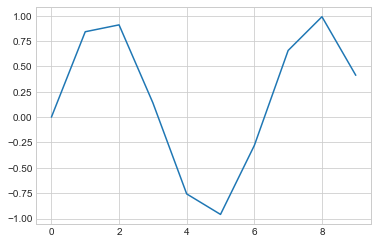

In [13]:
first_plot()

In [17]:
if __name__ == '__main__':
    with Pool(3) as p:
        p.map(multi_plot,[1,2,3])

In [18]:
p

In [20]:
def f(x):
    return x*x

if __name__ == '__main__':
    p = Pool(5)
    print(p.map(f, [1, 2, 3]))

[1, 4, 9]


In [28]:
from multiprocessing import Process
def f(name):
    print('hello', name)

if __name__ == '__main__':
    p = Process(target=f, args=('bob',))
    p.start()
    p.join()

hello bob


In [29]:
from multiprocessing import Process
import os

def info(title):
    print(title)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())

def f(name):
    info('function f')
    print('hello', name)

if __name__ == '__main__':
    info('main line')
    p = Process(target=f, args=('bob',))
    p.start()
    p.join()

main line
module name: __main__
parent process: 764
process id: 19035
function f
module name: __main__
parent process: 19035
process id: 19164
hello bob


In [35]:
import multiprocessing as mp

def foo(q):
    q.put('hello')

if __name__ == '__main__':
    #mp.set_start_method('spawn')
    q = mp.Queue()
    p = mp.Process(target=foo, args=(q,))
    p.start()
    print(q.get())
    p.join()

hello


In [ ]:
import multiprocessing as mp

def foo(q):
    q.put('hello')

if __name__ == '__main__':
    ctx = mp.get_context('spawn')
    q = ctx.Queue()
    p = ctx.Process(target=foo, args=(q,))
    p.start()
    print(q.get())
    p.join()